In [22]:
import pandas as pd
import matplotlib.pyplot as plt

In [27]:
df_dict_prob = {}
df_dict_basic = {}

name_list = ["1s", "300ms", "600ms", "150ms", "10ms"]
ordered_list = ["10ms", "150ms", "300ms", "600ms", "1s"]

for i in range(1, 6):
    name = f"test-latency{i}"

    df_dict_prob[name_list[i-1]] = pd.read_csv(f'data/{name}-prob.log')
    df_dict_basic[name_list[i-1]] = pd.read_csv(f'data/{name}-basic.log')

In [24]:
df_dict_prob["1s"].head()

,timeStamp,elapsed,label,responseCode,responseMessage,threadName,dataType,success,failureMessage,bytes,sentBytes,grpThreads,allThreads,URL,Latency,IdleTime,Connect
0,1674739440824,3832,HTTP Request 2,200,OK,ThreadGroup2 2-1,text,True,NaN,415,274,2,3,http://10.10.1.2:1323/invoke/hash,3828,0,35
1,1674739442510,2663,HTTP Request 2,200,OK,ThreadGroup2 2-2,text,True,NaN,429,274,1,2,http://10.10.1.2:1323/invoke/hash,2663,0,3
2,1674739446003,1005,HTTP Request 2,200,OK,ThreadGroup2 2-3,text,True,NaN,412,274,3,4,http://10.10.1.2:1323/invoke/hash,1005,0,5
3,1674739446109,935,HTTP Request 2,200,OK,ThreadGroup2 2-4,text,True,NaN,404,274,2,3,http://10.10.1.2:1323/invoke/hash,935,0,1
4,1674739447512,926,HTTP Request 2,200,OK,ThreadGroup2 2-6,text,True,NaN,405,274,3,4,http://10.10.1.2:1323/invoke/hash,926,0,2


In [25]:
# Filter all dataset with response code 200
df_dict_prob_200 = {}
df_dict_basic_200 = {}

for key in df_dict_prob.keys():
    df_dict_prob_200[key] = df_dict_prob[key][df_dict_prob[key]["responseCode"] == 200]
    df_dict_basic_200[key] = df_dict_basic[key][df_dict_basic[key]["responseCode"] == 200]

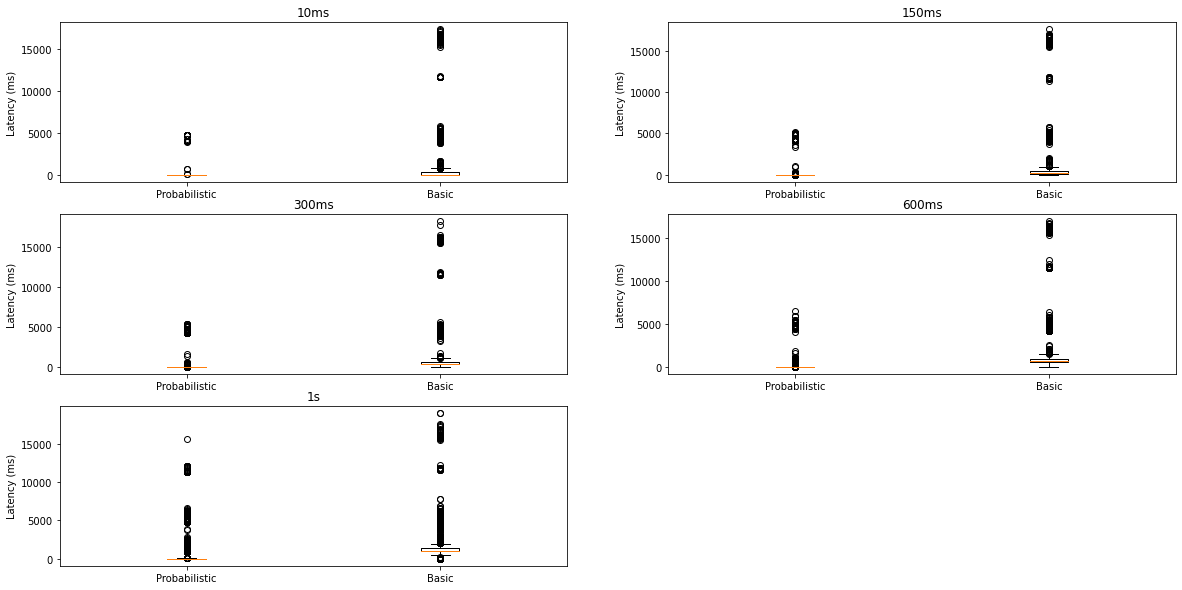

In [29]:
# Plot boxplot with latency
rows = 3
colums = 2

fig, ax = plt.subplots(rows, colums, figsize=(20, 10))

i = 0
row = 0
colum = 0

for key in ordered_list:
    ax[row][colum].boxplot([df_dict_prob_200[key]["elapsed"], df_dict_basic_200[key]["elapsed"]])
    ax[row][colum].set_title(key)
    ax[row][colum].set_xticklabels(["Probabilistic", "Basic"])
    ax[row][colum].set_ylabel("Latency (ms)")

    colum += 1
    if colum == colums:
        row += 1
        colum = 0

fig.delaxes(ax[2,1])
plt.show()

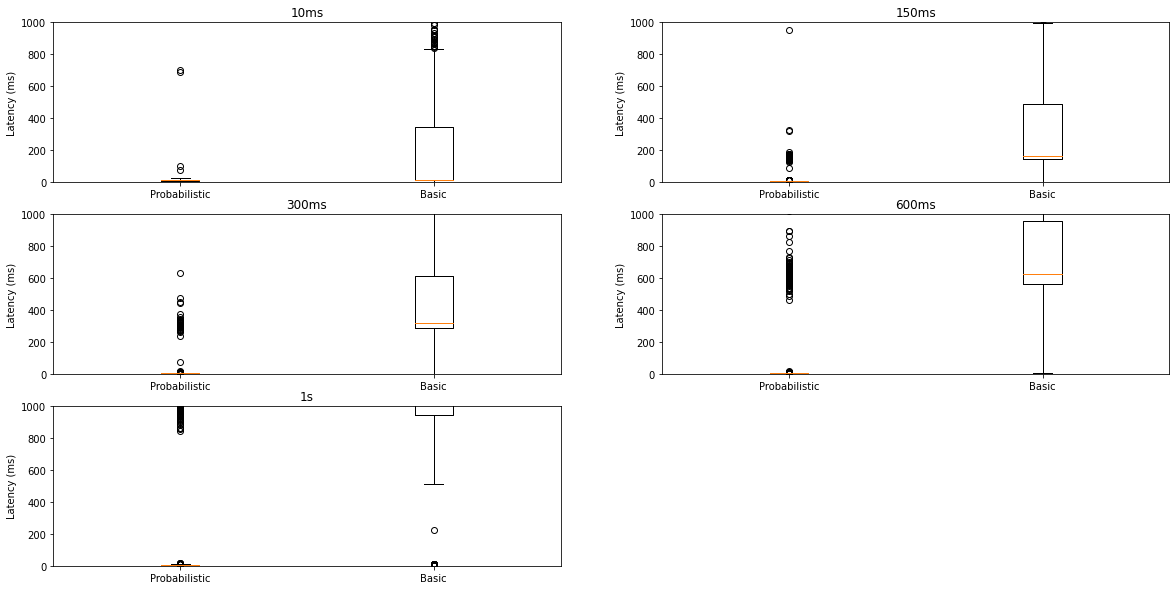

In [51]:
limit = 1000

# Plot boxplot with latency
rows = 3
colums = 2

fig, ax = plt.subplots(rows, colums, figsize=(20, 10))

i = 0
row = 0
colum = 0

for key in ordered_list:
    ax[row][colum].boxplot([df_dict_prob_200[key]["elapsed"], df_dict_basic_200[key]["elapsed"]])
    ax[row][colum].set_title(key)
    ax[row][colum].set_xticklabels(["Probabilistic", "Basic"])
    ax[row][colum].set_ylabel("Latency (ms)")
    ax[row][colum].set_ylim(0, limit)

    colum += 1
    if colum == colums:
        row += 1
        colum = 0

fig.delaxes(ax[2,1])
plt.show()

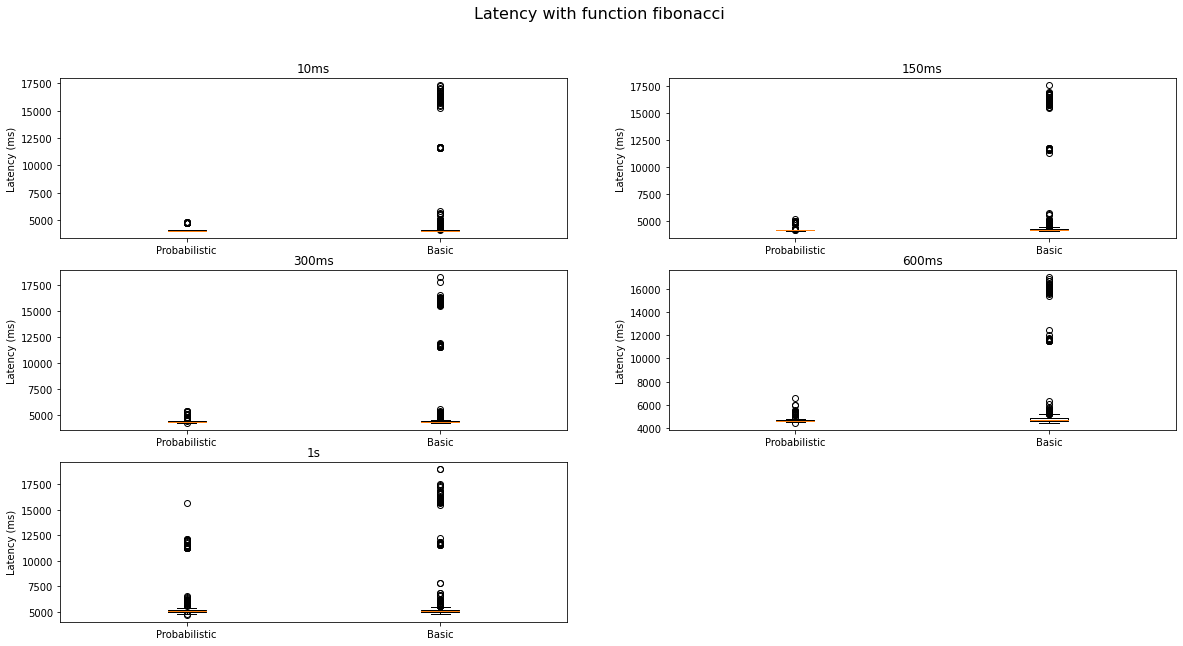

In [33]:
# Plot boxplot with latency
rows = 3
colums = 2

fig, ax = plt.subplots(rows, colums, figsize=(20, 10))
fig.suptitle("Latency with function fibonacci", fontsize=16)

i = 0
row = 0
colum = 0

for key in ordered_list:
    ax[row][colum].boxplot([df_dict_prob_200[key]["elapsed"][df_dict_prob_200[key]['threadName'].str.contains("ThreadGroup1", na=False)], df_dict_basic_200[key]["elapsed"][df_dict_basic_200[key]['threadName'].str.contains("ThreadGroup1", na=False)]])
    ax[row][colum].set_title(key)
    ax[row][colum].set_xticklabels(["Probabilistic", "Basic"])
    ax[row][colum].set_ylabel("Latency (ms)")

    colum += 1
    if colum == colums:
        row += 1
        colum = 0

fig.delaxes(ax[2,1])
plt.show()

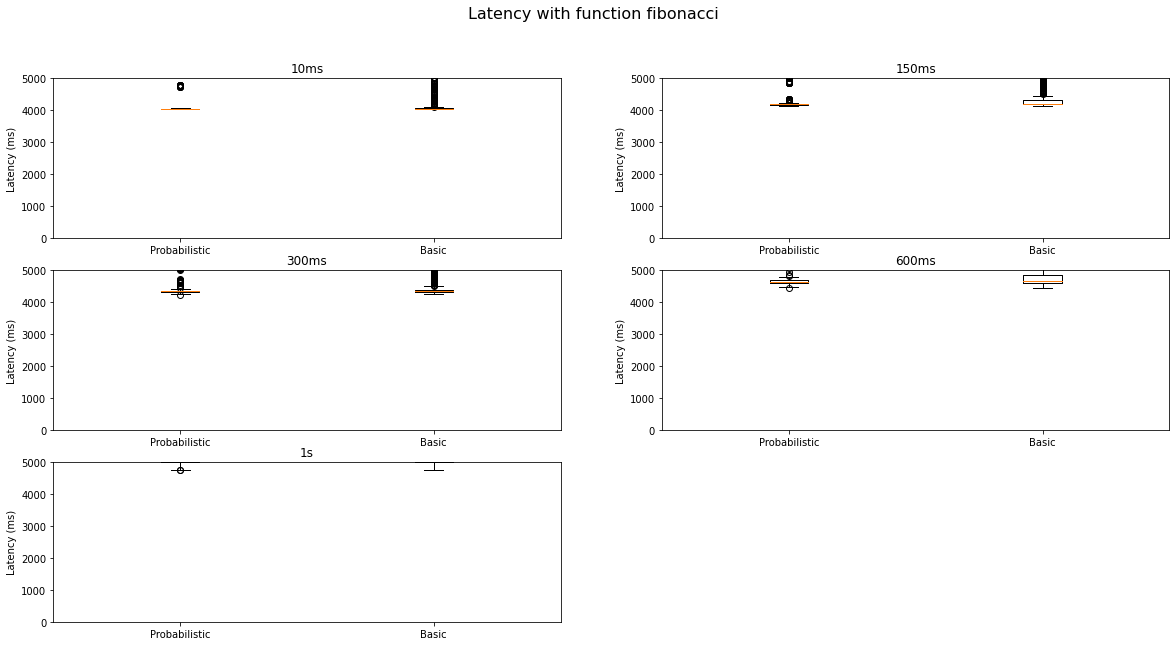

In [50]:
limit = 5000


# Plot boxplot with latency
rows = 3
colums = 2

fig, ax = plt.subplots(rows, colums, figsize=(20, 10))
fig.suptitle("Latency with function fibonacci", fontsize=16)

i = 0
row = 0
colum = 0

for key in ordered_list:
    ax[row][colum].boxplot([df_dict_prob_200[key]["elapsed"][(df_dict_prob_200[key]['threadName'].str.contains("ThreadGroup1", na=False))], df_dict_basic_200[key]["elapsed"][(df_dict_basic_200[key]['threadName'].str.contains("ThreadGroup1", na=False))]])
    ax[row][colum].set_title(key)
    ax[row][colum].set_xticklabels(["Probabilistic", "Basic"])
    ax[row][colum].set_ylabel("Latency (ms)")
    ax[row][colum].set_ylim(0, limit)

    colum += 1
    if colum == colums:
        row += 1
        colum = 0

fig.delaxes(ax[2,1])
plt.show()

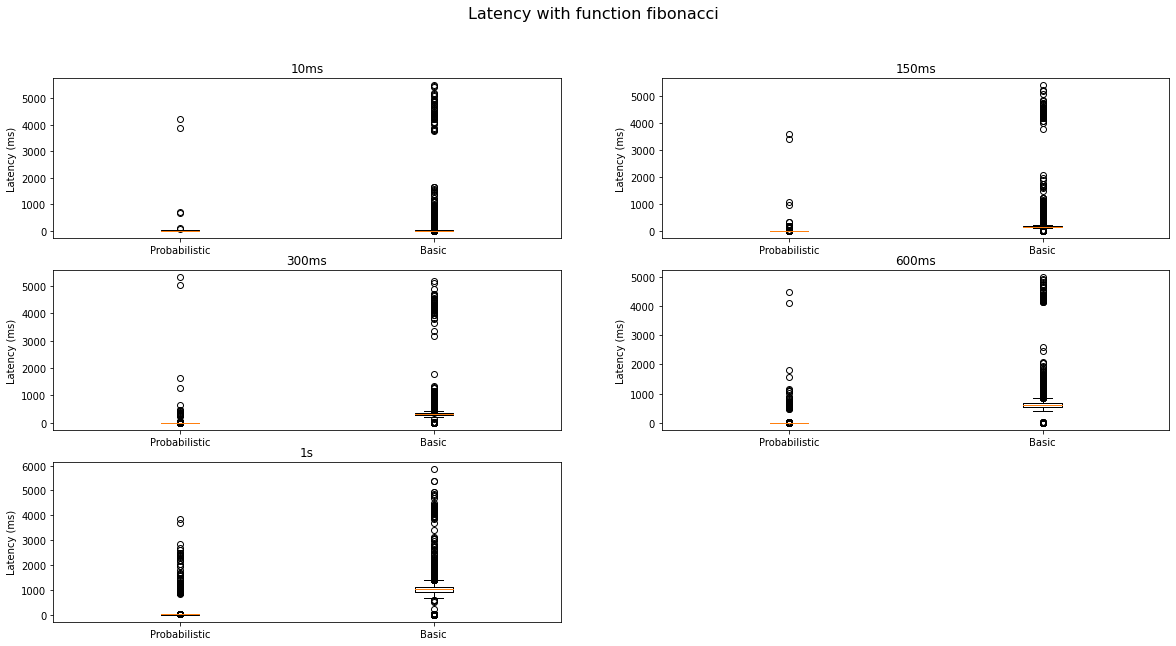

In [42]:
# Plot boxplot with latency
rows = 3
colums = 2

fig, ax = plt.subplots(rows, colums, figsize=(20, 10))
fig.suptitle("Latency with function fibonacci", fontsize=16)

i = 0
row = 0
colum = 0

for key in ordered_list:
    ax[row][colum].boxplot([df_dict_prob_200[key]["elapsed"][df_dict_prob_200[key]['threadName'].str.contains("ThreadGroup2", na=False)], df_dict_basic_200[key]["elapsed"][df_dict_basic_200[key]['threadName'].str.contains("ThreadGroup2", na=False)]])
    ax[row][colum].set_title(key)
    ax[row][colum].set_xticklabels(["Probabilistic", "Basic"])
    ax[row][colum].set_ylabel("Latency (ms)")

    colum += 1
    if colum == colums:
        row += 1
        colum = 0

fig.delaxes(ax[2,1])
plt.show()

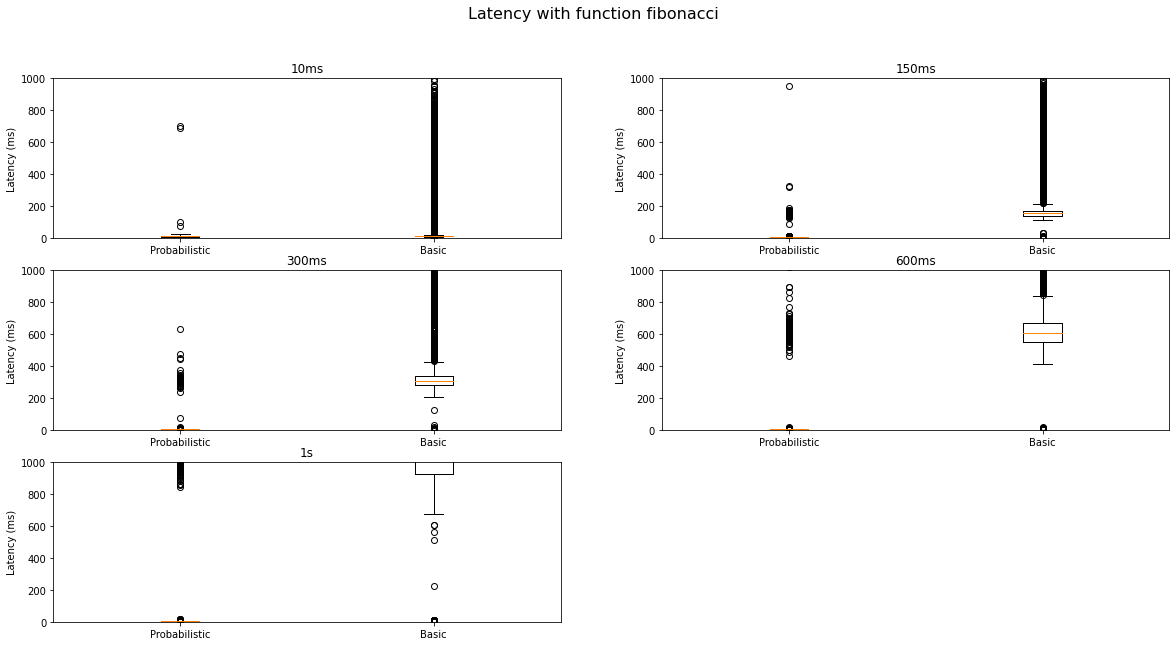

In [47]:
limit = 1000


# Plot boxplot with latency
rows = 3
colums = 2

fig, ax = plt.subplots(rows, colums, figsize=(20, 10))
fig.suptitle("Latency with function fibonacci", fontsize=16)

i = 0
row = 0
colum = 0

for key in ordered_list:
    ax[row][colum].boxplot([df_dict_prob_200[key]["elapsed"][(df_dict_prob_200[key]['threadName'].str.contains("ThreadGroup2", na=False))], df_dict_basic_200[key]["elapsed"][(df_dict_basic_200[key]['threadName'].str.contains("ThreadGroup2", na=False))]])
    ax[row][colum].set_title(key)
    ax[row][colum].set_xticklabels(["Probabilistic", "Basic"])
    ax[row][colum].set_ylabel("Latency (ms)")
    ax[row][colum].set_ylim(0, limit)

    colum += 1
    if colum == colums:
        row += 1
        colum = 0

fig.delaxes(ax[2,1])
plt.show()